Write a program to implement Baye’s classifier in Python ma Indian Diabetic Dataset

Dataset loaded successfully!
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome          

C:\Users\Mehak\AppData\Local\Temp\ipykernel_17872\360507140.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


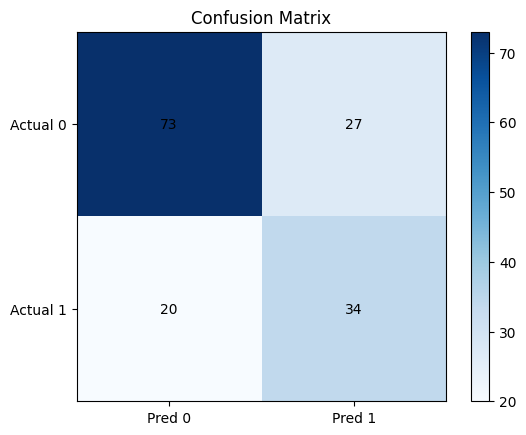

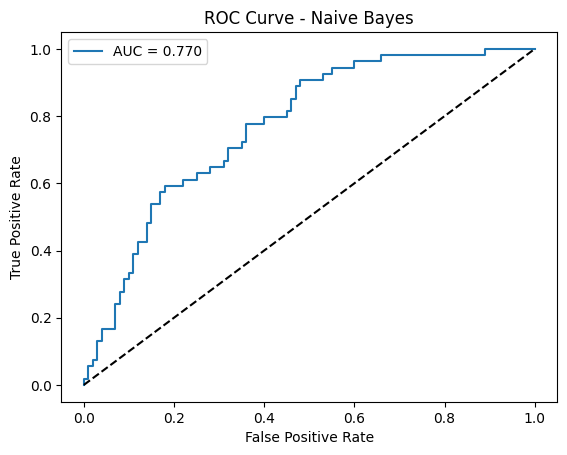

In [1]:
# ======================================
# 1️⃣ IMPORT LIBRARIES
# ======================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    roc_curve, auc
)

# ======================================
# 2️⃣ LOAD DATASET
# (Replace the path with your dataset path)
# ======================================
df = pd.read_csv(r"D:\B tech\Semester 5\ML\Practicals\dataset\diabetes.csv")

print("Dataset loaded successfully!")
print(df.head())

# ======================================
# 3️⃣ CHECK & HANDLE MISSING VALUES
# ======================================
print("\nMissing values:")
print(df.isnull().sum())

# Replace zeros in some medical attributes with mean (common for diabetes dataset)
cols_with_zero_invalid = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_zero_invalid:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].mean(), inplace=True)

print("\nMissing after cleaning:")
print(df.isnull().sum())

# ======================================
# 4️⃣ SPLIT FEATURES & TARGET
# ======================================
X = df.drop("Outcome", axis=1)   # Features
Y = df["Outcome"]                # Target (1 = Diabetic, 0 = Non-diabetic)

# Train-Test Split (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42, stratify=Y
)

print("\nTrain size:", len(X_train))
print("Test size:", len(X_test))

# ======================================
# 5️⃣ TRAIN NAIVE BAYES CLASSIFIER
# ======================================
model = GaussianNB()
model.fit(X_train, Y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# ======================================
# 6️⃣ EVALUATION METRICS
# ======================================
acc  = accuracy_score(Y_test, y_pred)
prec = precision_score(Y_test, y_pred)
rec  = recall_score(Y_test, y_pred)
f1   = f1_score(Y_test, y_pred)
cm   = confusion_matrix(Y_test, y_pred)

print("\nMODEL PERFORMANCE (Naive Bayes):")
print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)

print("\nClassification Report:\n", classification_report(Y_test, y_pred))

# ======================================
# 7️⃣ CONFUSION MATRIX
# ======================================
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ["Pred 0", "Pred 1"])
plt.yticks([0,1], ["Actual 0", "Actual 1"])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")
plt.show()

# ======================================
# 8️⃣ ROC CURVE
# ======================================
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes")
plt.legend()
plt.show()
